In [1]:
import pandas as pd
import numpy as np
# import pylab as pl
from numpy import fft
import seaborn as sns
import matplotlib.pylab as pl

### Fourier Analysis and Extrapolation : Finding trends and periodicity in MTA Turnstile Data (2 ave Subway)

In [2]:
data = pd.read_csv("UES_jf2ave_2017.csv")
print data.STATION.unique()
print data.shape
data.head()

['72 ST-2 AVE' '86 ST-2 AVE' '96 ST-2 AVE']
(1064, 6)


,Unnamed: 0,STATION,DATE,TIME,ENTRIES,NEW_ENTRIES
0,354,72 ST-2 AVE,1/1/2017,0:00:00,68,34
1,355,72 ST-2 AVE,1/1/2017,4:00:00,119538148,63
2,356,72 ST-2 AVE,1/1/2017,8:00:00,119538162,14
3,357,72 ST-2 AVE,1/1/2017,12:00:00,119538194,32
4,358,72 ST-2 AVE,1/1/2017,16:00:00,119543178,5024


In [4]:
def fourierExtrapolation(x, n_predict):
    """ This function fit the fourier analysis
     using the linear model
     params:
     x = input in array format
     n_predict = number of days to extrapolate
     """
    
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


In [5]:
#taking the count of rides per day
data = data.groupby("DATE").sum()
data = data.reset_index()

In [6]:
print "The median ridership in Jan: ", data[:31].NEW_ENTRIES.median()
print "The median ridership in Feb: ", data[31:].NEW_ENTRIES.median()

The median ridership in Jan:  43044.0
The median ridership in Feb:  48373.5


In [7]:
x = np.array(data.NEW_ENTRIES)

In [11]:
n_predict = 30 #number of days to predict - for March
extrapolation = fourierExtrapolation(x, n_predict)
extrapolation = extrapolation[58:]
extrapolation

array([ 41513.29533635,  40732.77179605,  44025.14372334,  49180.55364536,
        52153.63752485,  50663.989879  ,  46228.32250625,  42786.5759311 ,
        43244.07425316,  47065.14119267,  50936.16474446,  51694.81636218,
        48871.3510504 ,  44828.5386078 ,  42726.88453876,  44209.66935467,
        48511.53115936,  53242.25279378,  55918.40184868,  55238.14897407,
        51666.93117658,  47271.14438753,  44751.72982172,  45836.94661139,
        49849.65513876,  53703.36199704,  53887.16504024,  49304.07437658,
        42621.07333124,  38578.48237107,  40247.41720766])

In [14]:
print "The median ridership in March: ", np.median(extrapolation)

The median ridership in March:  47271.1443875


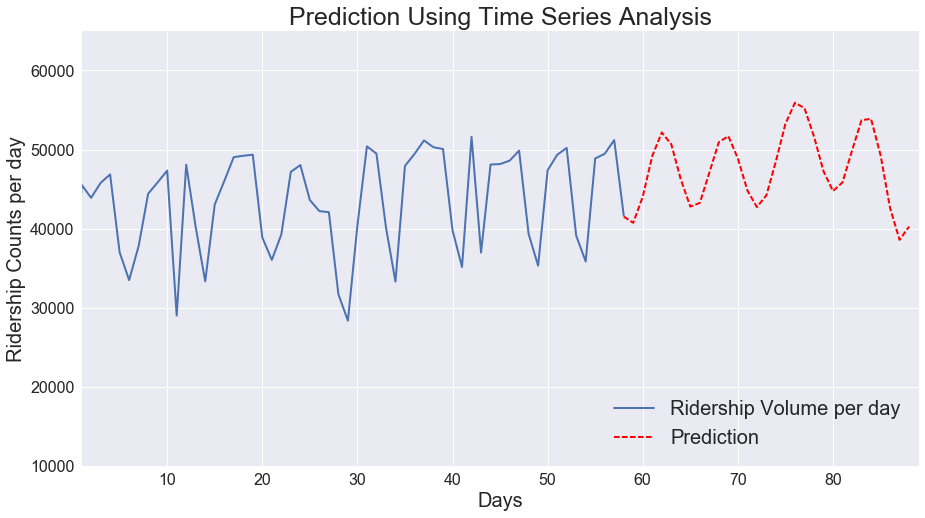

In [17]:
fig = pl.figure(figsize=(15,8))    
ax = fig.add_subplot(1,1,1)
pl.plot(np.arange(0, x.size), x, label = 'Ridership Volume per day', linewidth = 2)
pl.plot(np.arange(58, 89), extrapolation, 'r--',linewidth = 2, label = 'Prediction')

pl.legend(fontsize =20, loc = "lower right")
pl.title("Prediction Using Time Series Analysis", fontsize = 25)
pl.xlabel("Days", fontsize = 20)
pl.ylabel("Ridership Counts per day", fontsize = 20)
pl.xticks(fontsize=16)
pl.yticks(fontsize = 16)
pl.xlim(1,89,5)
pl.ylim(10000,65000,5000)
pl.show()